In [1]:
import pandas as pd
from pylab import *

df = pd.read_csv ('napadi_smtp1.csv')
df["Timestamp"] = pd.to_datetime(df['Timestamp'], format="%Y-%b-%d %H:%M:%S")

# Izaberi interval vremena za posmatranje
df = df[(df['Timestamp'] > '2022-08-24 07:00:00') ]#& (df['Timestamp'] < '2022-09-16 07:00:00')]

In [2]:
# Izbaci par outliera
df=df.drop(df[df.IP=="147.91.207.214"].index)
df=df.drop(df[df.IP=="103.85.204.98"].index)

In [3]:
# Broj napada po IP adresi - srednja vrednost i varijansa
print("Srednja vrednost: ", df.groupby("IP").count().mean()['Timestamp'])
print("Medijana: ", df.groupby("IP").count().median()['Timestamp'])
print("Standardna devijacija: ", sqrt(df.groupby("IP").count().var())['Timestamp'])

Srednja vrednost:  10.625783843600148
Medijana:  10.0
Standardna devijacija:  9.009696916119063


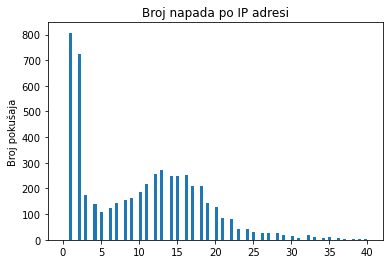

In [4]:
# Histogram broja napada po IP adresama
broj_napada_po_ip = df.groupby("IP").count()

hist(broj_napada_po_ip, bins=100, range=(0,40));
title('Broj napada po IP adresi')
ylabel('Broj pokušaja');

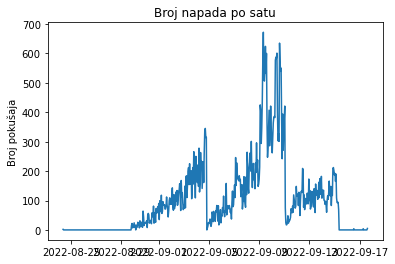

In [5]:
# Intenzitet napada u vremenu
groups = df.groupby((pd.Grouper(key='Timestamp', freq='1H')))
frekvencija_napada = groups.count()

plot(frekvencija_napada);
title('Broj napada po satu')
ylabel('Broj pokušaja');

Srednja vrednost:  24.774734430327015
Medijana:  8.0
Standardna devijacija:  121.31788621831426


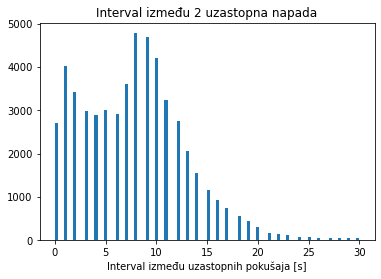

In [6]:
# Vremenska razlika medju napadima u sekundama
vreme_izmedju_pokusaja = diff(df["Timestamp"])/1.e9
vreme_izmedju_pokusaja = vreme_izmedju_pokusaja.astype(float)

# Skloni outliers
vreme_izmedju_pokusaja[vreme_izmedju_pokusaja>10000]=0

# Opsta statistika
print("Srednja vrednost: ", mean(vreme_izmedju_pokusaja))
print("Medijana: ", median(vreme_izmedju_pokusaja))
print("Standardna devijacija: ", sqrt(var(vreme_izmedju_pokusaja)))

hist(vreme_izmedju_pokusaja, bins=100, range=(0,30));
title("Interval između 2 uzastopna napada");
xlabel('Interval između uzastopnih pokušaja [s]');

In [7]:
# Grupisanje po pojedinacnim IP adresama
gb = df.groupby('IP')
grupe = [gb.get_group(x) for x in gb.groups]

In [8]:
# Izaveri samo one IP adrese koje se pojavljuju više od jedanput
podobne_grupe = [x for x in grupe if x.count()['Timestamp']>2]

In [9]:
# Prodji kroz sve grupe i formiraj diff listu
intervali_napada=[]
for grupa in podobne_grupe:
    intervali_napada.extend(diff(grupa['Timestamp']))

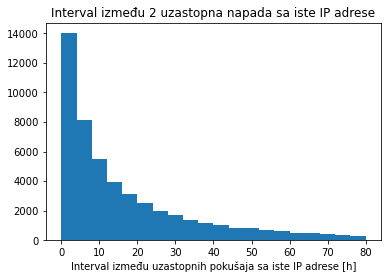

In [10]:
intervali_napada = [float(x)/1.e9/3600 for x in intervali_napada]

hist(intervali_napada, bins=20, range=(0,80));
title('Interval između 2 uzastopna napada sa iste IP adrese');
xlabel('Interval između uzastopnih pokušaja sa iste IP adrese [h]');
savefig('interval_smtp1.png', dpi=600)

In [11]:
mean(intervali_napada)

20.311764449669038

In [12]:
median(intervali_napada)

10.448611111111111